In [7]:
import numpy as np

def epsilon_cp1(omega, omega1, omega01, gamma1, A1):
    """
    Calculate epsilon_CP1(omega) based on the provided formula.
    
    Parameters:
    omega (float): Angular frequency
    omega1 (float): Parameter omega1
    omega01 (float): Parameter omega01
    gamma1 (float): Damping constant gamma1
    A1 (float): Amplitude A1
    
    Returns:
    float: The calculated epsilon_CP1 value
    """
    # Common terms
    i = 1j  # Imaginary unit
    term1 = (omega + i * gamma1)
    sqrt_term = np.sqrt(omega1 - omega01)
    sqrt_fraction = np.sqrt((omega1 - omega01) / omega1)
    
    # Logarithmic term
    log_term = np.log(1 - ((term1 / omega01)**2))
    
    # First fraction
    fraction1 = -sqrt_term / (2 * (term1**2))
    
    # Hyperbolic tangent term
    tanh_inv_term = np.arctanh(-sqrt_fraction)
    
    # Tangent term
    tan_inv_term = np.arctan(np.sqrt((omega1 - omega01) / (omega + i * gamma1 - omega1)))
    
    # Second fraction
    sqrt_fraction2 = np.sqrt(omega + i * gamma1 - omega1)
    fraction2 = -sqrt_fraction2 / (term1**2)
    
    # Combine all terms
    epsilon = A1 * (fraction1 * log_term + 2 * np.sqrt(omega1) / (term1**2) * tanh_inv_term + fraction2 * tan_inv_term)
    
    return epsilon

# Example usage
omega = 1.0
omega1 = 2.0
omega01 = 1.5
gamma1 = 0.05
A1 = 10.0

result = epsilon_cp1(omega, omega1, omega01, gamma1, A1)
print(f"Epsilon_CP1(omega): {result}")


Epsilon_CP1(omega): (-22.098918518303975+2.3651211948527617j)


In [8]:
import numpy as np

def epsilon_cp2(omega, omega02, gamma2, A2):
    """
    Calculate epsilon_CP2(omega) based on the provided formula.

    Parameters:
    omega (float): Angular frequency
    omega02 (float): Parameter omega02
    gamma2 (float): Damping constant gamma2
    A2 (float): Amplitude A2

    Returns:
    complex: The calculated epsilon_CP2 value
    """
    # Common terms
    i = 1j  # Imaginary unit
    term2 = (omega + i * gamma2)

    # Fractional term
    fraction = A2 / (2 * (term2**2))

    # Logarithmic term (complex logarithm is handled here)
    log_arg = 1 - ((term2 / omega02)**2)
    log_term = np.log(log_arg)  # This will return a complex value if log_arg is complex

    # Combine terms
    epsilon = fraction * log_term

    return epsilon

# Example usage
omega = 1.0
omega02 = 1.5
gamma2 = 0.1
A2 = 5.0

result = epsilon_cp2(omega, omega02, gamma2, A2)
print(f"Epsilon_CP2(omega): {result}")


Epsilon_CP2(omega): (-1.4537460854634634-0.10383127749877163j)


In [14]:
import numpy as np

def epsilon(omega, epsilon_inf, omega_p2, omega2, gamma_p, epsilon_cp1, epsilon_cp2):
    """
    Calculate epsilon(omega) based on the provided formula.

    Parameters:
    omega (float): Angular frequency
    epsilon_inf (float): High-frequency dielectric constant
    omega_p2 (float): Plasma frequency squared
    omega2 (float): Resonance frequency for term 2
    gamma_p (float): Damping constant for plasma term
    epsilon_cp1 (function): Function for epsilon_CP1(omega)
    epsilon_cp2 (function): Function for epsilon_CP2(omega)

    Returns:
    float: The calculated epsilon(omega) value
    """
    # Common terms
    i = 1j  # Imaginary unit
    term_p = (omega2 + i * omega * gamma_p)
    
    # Plasma term
    plasma_term = omega_p2 / term_p
    
    # Combine terms
    epsilon = epsilon_inf - plasma_term + epsilon_cp1 + epsilon_cp2
    
    return epsilon

# Example usage
omega = 1.0
epsilon_inf = 2.568
omega_p2 = (8.905**2)
gamma_p = 0.109
A1 = 56.39
omega01 = 2.342
omega1 = 2.714
gamma1 = 0.125
A2 = 32.13
omega2 = 3.516
gamma2 = 0.264



# Critical points calculations
epsilon_cp1_calc = epsilon_cp1(omega, omega1, omega01, gamma1, A1)
epsilon_cp2_calc = epsilon_cp2(omega, omega02, gamma2, A2)

result = epsilon(omega, epsilon_inf, omega_p2, omega2, gamma_p, epsilon_cp1_calc, epsilon_cp1_calc)
print(f"Epsilon(omega): {result}")


Epsilon(omega): (-222.09962842597707+53.48340238060728j)


Using the Fitting Equation from O. Pena-Rodriguez

In [101]:
# Constants for DCP model based on xAg
def calculate_constants(xAg):
    a1, a2, a3 = 2.614, -0.747, 0  # epsilon_inf coefficients
    epsilon_inf = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 8.996, 0.033, 0  # omega_p coefficients
    omega_p = a1 + a2 * xAg + a3 * (xAg**2)
    omega_p2 = omega_p**2

    a1, a2, a3 = 0.096, 0.378, -0.392  # gamma_p coefficients
    gamma_p = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 64.64, -106.6, 92.62  # A1 coefficients
    A1 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 2.231, 1.107, 0  # omega01 coefficients
    omega01 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 2.561, 1.513, 0  # omega1 coefficients
    omega1 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 0.128, 0.327, -0.413  # gamma1 coefficients
    gamma1 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 30.59, 30.64, -42.07  # A2 coefficients
    A2 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 3.364, 1.071, 0  # omega02 coefficients
    omega02 = a1 + a2 * xAg + a3 * (xAg**2)

    a1, a2, a3 = 0.256, 0.202, -0.242  # gamma2 coefficients
    gamma2 = a1 + a2 * xAg + a3 * (xAg**2)

    return {
        "epsilon_inf": epsilon_inf,
        "omega_p2": omega_p2,
        "gamma_p": gamma_p,
        "A1": A1,
        "omega01": omega01,
        "omega1": omega1,
        "gamma1": gamma1,
        "A2": A2,
        "omega02": omega02,
        "gamma2": gamma2,
    }

# Input: Gold molar fraction
xAg = 0.5  # Example value, modify as needed

# Calculate constants
constants = calculate_constants(xAg)

# Example omega value
omega = 1.0

# Calculate critical points
epsilon_cp1_calc = epsilon_cp1(omega, constants["omega1"], constants["omega01"], constants["gamma1"], constants["A1"])
epsilon_cp2_calc = epsilon_cp2(omega, constants["omega02"], constants["gamma2"], constants["A2"])

# Calculate epsilon
result = epsilon(
    omega,
    constants["epsilon_inf"],
    constants["omega_p2"],
    constants["omega02"],
    constants["gamma_p"],
    epsilon_cp1_calc,
    epsilon_cp2_calc,
)

print(f"Epsilon(omega): {result}")

TypeError: epsilon() takes 6 positional arguments but 7 were given

In [80]:
# Deepseek R1
import numpy as np

def epsilon_cp1(omega, omega1, omega01, gamma1, A1):
    i = 1j
    term1 = omega + i * gamma1
    sqrt_term = np.sqrt(omega1 - omega01)
    sqrt_fraction = np.sqrt((omega1 - omega01) / omega1)
    log_term = np.log(1 - (term1 / omega01)**2)
    fraction1 = -sqrt_term / (2 * term1**2)
    tanh_inv_term = np.arctanh(-sqrt_fraction)
    sqrt_fraction2 = np.sqrt(term1 - omega1)
    fraction2 = -sqrt_fraction2 / (term1**2)
    tan_inv_term = np.arctan(np.sqrt((omega1 - omega01) / (term1 - omega1)))
    epsilon = A1 * (fraction1 * log_term + 2 * np.sqrt(omega1) / (term1**2) * tanh_inv_term + fraction2 * tan_inv_term)
    return epsilon

def epsilon_cp2(omega, omega02, gamma2, A2):
    i = 1j
    term2 = omega + i * gamma2
    fraction = A2 / (2 * term2**2)
    log_arg = 1 - (term2 / omega02)**2
    log_term = np.log(log_arg)
    epsilon = fraction * log_term
    return epsilon

def epsilon(omega, epsilon_inf, omega_p2, gamma_p, epsilon_cp1_val, epsilon_cp2_val):
    i = 1j
    term_p = omega**2 + i * omega * gamma_p
    plasma_term = omega_p2 / term_p
    epsilon_total = epsilon_inf - plasma_term + epsilon_cp1_val + epsilon_cp2_val
    return epsilon_total

# Example usage with parameters from the paper
omega = 4
epsilon_inf = 2.568
omega_p = 8.905
omega_p2 = omega_p**2
gamma_p = 0.109
A1 = 56.39
omega01 = 2.342
omega1 = 2.714
gamma1 = 0.125
A2 = 32.13
omega02 = 1.5  # Ensure this value is correct as per the paper
gamma2 = 0.264

# Calculate epsilon_CP1 and epsilon_CP2
epsilon_cp1_calc = epsilon_cp1(omega, omega1, omega01, gamma1, A1)
epsilon_cp2_calc = epsilon_cp2(omega, omega02, gamma2, A2)

# Calculate the total epsilon
result = epsilon(omega, epsilon_inf, omega_p2, gamma_p, epsilon_cp1_calc, epsilon_cp2_calc)
print(f"Epsilon(omega): {result}")
# Calculate n and k
n, k = calculate_nk(result)
print(f"n: {n}")
print(f"k: {k}")

Epsilon(omega): (-7.941944376539557+0.633338038377151j)
n: 0.11227879530674062
k: 2.8203813402472884


In [113]:
# o1 preview
import numpy as np
from numpy.lib.scimath import sqrt as csqrt, log as clog

def epsilon_cp1(omega, omega_g1, omega01, gamma1, A1):
    i = 1j  # Imaginary unit
    term1 = omega + i * gamma1

    # Fraction 1: Arctan term
    sqrt_arg1 = (omega_g1 - omega01) / (term1 - omega_g1)
    arctan_term = np.arctan(csqrt(sqrt_arg1))
    fraction1 = -csqrt(term1 - omega_g1) * arctan_term / (term1**2)

    # Fraction 2: Atanh term
    sqrt_arg2 = (omega_g1 - omega01) / (term1 + omega_g1)
    atanh_term = np.arctanh(csqrt(sqrt_arg2))
    fraction2 = -csqrt(term1 + omega_g1) * atanh_term / (term1**2)

    # Fraction 3: Atanh term for omega_g1
    atanh_term_g1 = np.arctanh(csqrt((omega_g1 - omega01) / omega_g1))
    fraction3 = 2 * csqrt(omega_g1) * atanh_term_g1 / (term1**2)

    # Log term
    log_arg = 1 - ((term1 / omega01)**2)
    log_term = np.log(log_arg)
    fraction4 = -csqrt(omega_g1 - omega01) * log_term / (2 * term1**2)

    # Combine all terms
    epsilon = A1 * (fraction1 + fraction2 + fraction3 + fraction4)
    return epsilon


def epsilon_cp2(omega, omega02, gamma2, A2):
    i = 1j  # Imaginary unit
    term2 = (omega + (i * gamma2))
    
    # Fractional term
    fraction = A2 / (2 * (term2**2))
    
    # Logarithmic term
    log_arg = 1 - ((term2 / omega02)**2)
    log_term = clog(log_arg)
    
    # Combine terms
    epsilon = -fraction * log_term
    
    return epsilon

def epsilon(omega, epsilon_inf, omega_p, gamma_p, epsilon_cp1, epsilon_cp2):
    i = 1j  # Imaginary unit
    term_p = omega**2 + (i * gamma_p * omega)
    plasma_term = (omega_p**2) / term_p
    
    # Combine terms
    epsilon = epsilon_inf - plasma_term + epsilon_cp1 + epsilon_cp2
    
    return epsilon

# Example usage
omega = 3
epsilon_inf = 2.568
omega_p = 8.905
gamma_p = 0.109
A1 = 56.39
omega01 = 2.342
omega1 = 2.714
gamma1 = 0.125
A2 = 32.13
omega02 = 3.516
omega2 = 3.516
gamma2 = 0.264

# Critical points calculations
epsilon_cp1_calc = epsilon_cp1(omega, omega1, omega01, gamma1, A1)
epsilon_cp2_calc = epsilon_cp2(omega, omega02, gamma2, A2)

result = epsilon(omega, epsilon_inf, omega_p, gamma_p, epsilon_cp1_calc, epsilon_cp2_calc)
print(f"Epsilon(omega): {result}")

def calculate_nk(epsilon):
    # Extract real and imaginary parts
    epsilon_real = np.real(epsilon)
    epsilon_imag = np.imag(epsilon)
    
    # Calculate magnitude of epsilon
    epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)
    
    # Calculate n
    n = np.sqrt((epsilon_magnitude + epsilon_real) / 2)
    
    # Calculate k
    k = np.sqrt((epsilon_magnitude - epsilon_real) / 2)

    return n, k

# Calculate n and k

n, k = calculate_nk(result)
print(f"n: {n}")
print(f"k: {k}")


Epsilon(omega): (-1.5826295644780348+5.873174691441859j)
n: 1.500007053869322
k: 1.9577156908335178


In [114]:
def calculate_nk(epsilon):
    # Extract real and imaginary parts
    epsilon_real = np.real(epsilon)
    epsilon_imag = np.imag(epsilon)
    
    # Calculate magnitude of epsilon
    epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)
    
    # Calculate n
    n = np.sqrt((epsilon_magnitude + epsilon_real) / 2)
    
    # Calculate k
    k = np.sqrt((epsilon_magnitude - epsilon_real) / 2)

    return n, k


# Calculate n and k
n, k = calculate_nk(result)
print(f"n: {n}")
print(f"k: {k}")

n: 1.500007053869322
k: 1.9577156908335178


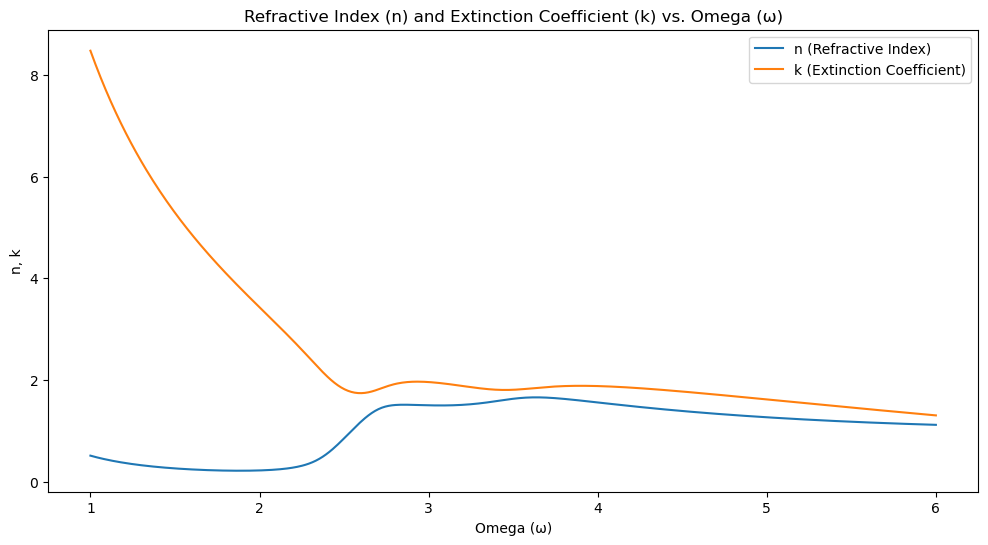

In [115]:
import matplotlib.pyplot as plt
import numpy as np

# Function to calculate n and k
def calculate_nk(epsilon):
    epsilon_real = np.real(epsilon)
    epsilon_imag = np.imag(epsilon)
    epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)
    n = np.sqrt((epsilon_magnitude + epsilon_real) / 2)
    k = np.sqrt((epsilon_magnitude - epsilon_real) / 2)
    return n, k

# Generate omega values and compute n, k
omega_values = np.linspace(1, 6.0, 500)  # Adjust range as needed
nk_values = [
    calculate_nk(epsilon(
        om,
        epsilon_inf,
        omega_p2,
        gamma_p,
        epsilon_cp1(om, omega1, omega01, gamma1, A1),
        epsilon_cp2(om, omega02, gamma2, A2),
    )) for om in omega_values
]

# Separate n and k values
n_values, k_values = zip(*nk_values)

# Plot n and k
plt.figure(figsize=(12, 6))
plt.plot(omega_values, n_values, label='n (Refractive Index)')
plt.plot(omega_values, k_values, label='k (Extinction Coefficient)')
plt.xlabel('Omega (ω)')
plt.ylabel('n, k')
plt.title('Refractive Index (n) and Extinction Coefficient (k) vs. Omega (ω)')
plt.legend()
plt.show()

In [116]:
# Constants for DCP model based on xAg
def calculate_constants(xAg):
    # epsilon_inf coefficients
    epsilon_inf = 2.614 - 0.747 * xAg
    
    # omega_p coefficients
    omega_p = 8.996 + 0.033 * xAg

    # gamma_p coefficients
    gamma_p = 0.096 + 0.378 * xAg - (0.392 * (xAg**2))

    # A1 coefficients
    A1 = 64.64 - 106.6 * xAg + 92.62 * (xAg**2)

    # omega01 coefficients
    omega01 = 2.231 + 1.107 * xAg

    # omega1 coefficients
    omega1 = 2.561 + 1.513 * xAg

    # gamma1 coefficients
    gamma1 = 0.128 + 0.327 * xAg - (0.413 * (xAg**2))

    # A2 coefficients
    A2 = 30.59 + 30.64 * xAg - (42.07 * (xAg**2))

    # omega02 coefficients
    omega02 = 3.364 + 1.071 * xAg

    # gamma2 coefficients
    gamma2 = 0.256 + 0.202 * xAg - (0.242 * (xAg**2))

    return {
        "epsilon_inf": epsilon_inf,
        "omega_p": omega_p,
        "gamma_p": gamma_p,
        "A1": A1,
        "omega01": omega01,
        "omega1": omega1,
        "gamma1": gamma1,
        "A2": A2,
        "omega02": omega02,
        "gamma2": gamma2,
    }
print (calculate_constants(0))

{'epsilon_inf': 2.614, 'omega_p': 8.996, 'gamma_p': 0.096, 'A1': 64.64, 'omega01': 2.231, 'omega1': 2.561, 'gamma1': 0.128, 'A2': 30.59, 'omega02': 3.364, 'gamma2': 0.256}


Epsilon(omega): (-1.9988176490019396+6.6388803148635835j)
n: 1.5707380163158127
k: 2.113299686485964


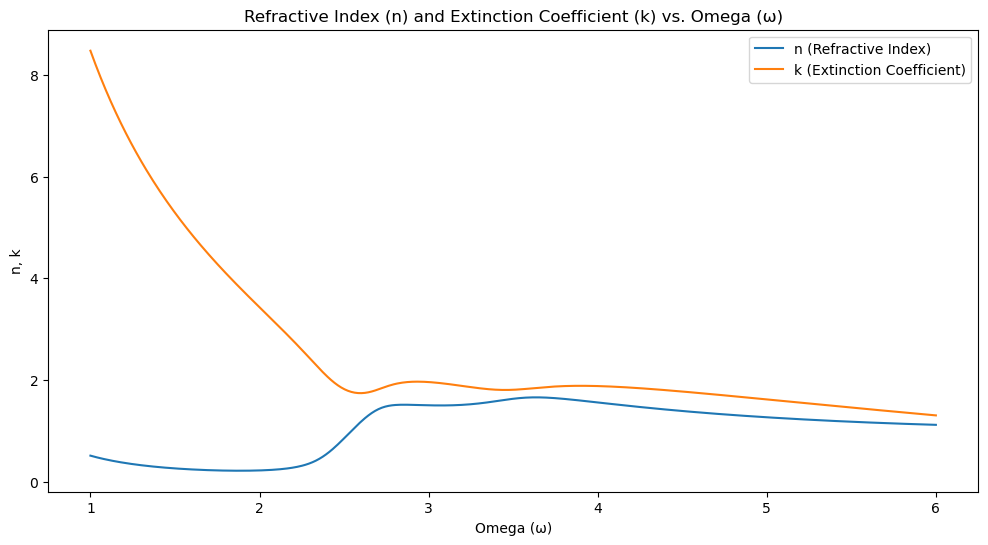

In [117]:
# Example usage with calculated constants
xAg = 0  # Define your molar fraction of silver
constants = calculate_constants(xAg)  # Calculate constants based on xAg

# Example omega value for computation
omega = 3

# Calculate critical points using the constants
epsilon_cp1_calc = epsilon_cp1(
    omega,
    constants["omega1"],
    constants["omega01"],
    constants["gamma1"],
    constants["A1"]
)
epsilon_cp2_calc = epsilon_cp2(
    omega,
    constants["omega02"],
    constants["gamma2"],
    constants["A2"]
)

# Calculate epsilon using the updated parameters
result = epsilon(
    omega,
    constants["epsilon_inf"],
    constants["omega_p"],
    constants["gamma_p"],
    epsilon_cp1_calc,
    epsilon_cp2_calc
)

print(f"Epsilon(omega): {result}")

# Define calculate_nk function as before
def calculate_nk(epsilon):
    # Extract real and imaginary parts
    epsilon_real = np.real(epsilon)
    epsilon_imag = np.imag(epsilon)
    
    # Calculate magnitude of epsilon
    epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)
    
    # Calculate n
    n = np.sqrt((epsilon_magnitude + epsilon_real) / 2)
    
    # Calculate k
    k = np.sqrt((epsilon_magnitude - epsilon_real) / 2)

    return n, k

# Calculate n and k using the computed epsilon
n, k = calculate_nk(result)
print(f"n: {n}")
print(f"k: {k}")

# Function to calculate n and k
def calculate_nk(epsilon):
    epsilon_real = np.real(epsilon)
    epsilon_imag = np.imag(epsilon)
    epsilon_magnitude = np.sqrt(epsilon_real**2 + epsilon_imag**2)
    n = np.sqrt((epsilon_magnitude + epsilon_real) / 2)
    k = np.sqrt((epsilon_magnitude - epsilon_real) / 2)
    return n, k

# Generate omega values and compute n, k
omega_values = np.linspace(1, 6.0, 500)  # Adjust range as needed
nk_values = [
    calculate_nk(epsilon(
        om,
        epsilon_inf,
        omega_p2,
        gamma_p,
        epsilon_cp1(om, omega1, omega01, gamma1, A1),
        epsilon_cp2(om, omega02, gamma2, A2),
    )) for om in omega_values
]

# Separate n and k values
n_values, k_values = zip(*nk_values)

# Plot n and k
plt.figure(figsize=(12, 6))
plt.plot(omega_values, n_values, label='n (Refractive Index)')
plt.plot(omega_values, k_values, label='k (Extinction Coefficient)')
plt.xlabel('Omega (ω)')
plt.ylabel('n, k')
plt.title('Refractive Index (n) and Extinction Coefficient (k) vs. Omega (ω)')
plt.legend()
plt.show()

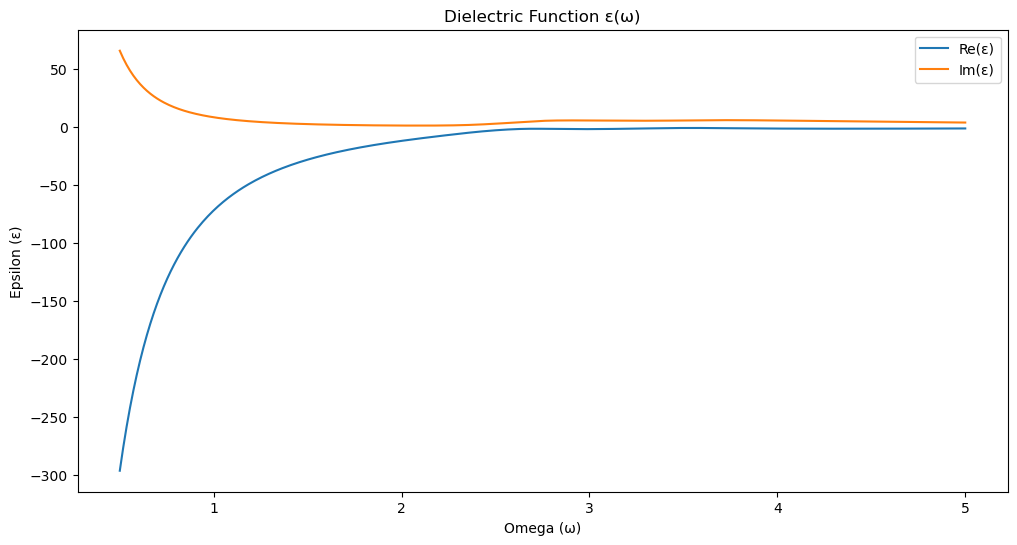

In [118]:
import matplotlib.pyplot as plt

omega_values = np.linspace(0.5, 5.0, 500)  # Adjust range as needed
epsilon_values = [epsilon(om, epsilon_inf, omega_p2, gamma_p, 
                          epsilon_cp1(om, omega1, omega01, gamma1, A1), 
                          epsilon_cp2(om, omega02, gamma2, A2)) for om in omega_values]

plt.figure(figsize=(12, 6))
plt.plot(omega_values, [np.real(eps) for eps in epsilon_values], label='Re(ε)')
plt.plot(omega_values, [np.imag(eps) for eps in epsilon_values], label='Im(ε)')
plt.xlabel('Omega (ω)')
plt.ylabel('Epsilon (ε)')
plt.title('Dielectric Function ε(ω)')
plt.legend()
plt.show()
